In [32]:
import scanpy as sc
import numpy as np
adata = sc.read("../../data/predictions/adamson_pred_sclambda_1.h5ad")
adata_baseline = sc.read("../../data/predictions/adamson_pred_baseline_1.h5ad")

In [33]:
test_rows = ~np.all(np.isnan(adata.layers["pred_sclambda"]), axis=1)
actual = adata.X.toarray()[test_rows]
pred = adata.layers["pred_sclambda"][test_rows]
# print(actual[0])
# print(pred[0])

test_rows = ~np.all(np.isnan(adata_baseline.layers["pred_baseline_mean"]), axis=1)
actual_b = adata_baseline.X.toarray()[test_rows]
pred_b = adata_baseline.layers["pred_baseline_mean"][test_rows]
# print(actual_b[0])
# print(pred_b[0])

In [37]:
# compute per-gene pearson correlation
correlations = np.array([
    np.corrcoef(pred[i, :], pred_b[i, :])[0, 1]
    for i in range(pred.shape[0])
])
print(correlations[0])

0.9998954584820684


Mean correlation across cells: 0.9998954584820686


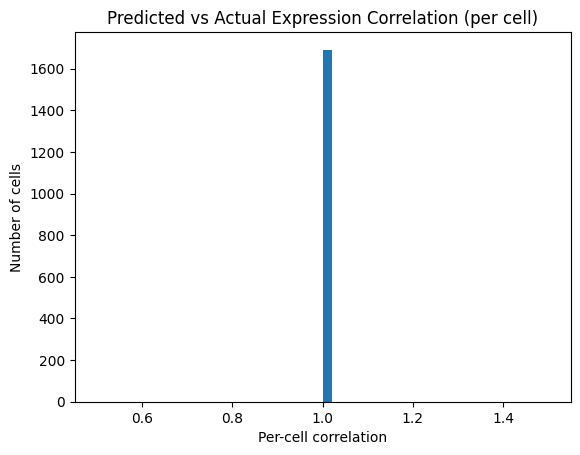

In [35]:
print("Mean correlation across cells:", np.nanmean(correlations))

# optional: histogram
import matplotlib.pyplot as plt
plt.hist(correlations, bins=50)
plt.xlabel("Per-cell correlation")
plt.ylabel("Number of cells")
plt.title("Predicted vs Actual Expression Correlation (per cell)")
plt.show()

In [38]:
mask_not_test = adata.obs["split"].isin(["train", "val"])
adata_not_test = adata[mask_not_test]
mean_gene_expression = adata_not_test.X.mean(axis=0)
print(mean_gene_expression)

[[0.3655836  0.5059202  0.07009104 ... 4.9629183  0.84876364 4.285834  ]]


In [39]:
n_cells, n_genes = adata.n_obs, adata.n_vars
adata.layers["pred_baseline_mean"] = np.full((n_cells, n_genes), np.nan, dtype=float)
mask_test = adata.obs["split"] == "test"
adata.layers["pred_baseline_mean"][mask_test] = mean_gene_expression

In [40]:
adata.layers["pred_baseline_mean"]

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.3655836 , 0.50592017, 0.07009104, ..., 4.96291828, 0.84876364,
        4.28583384],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])